In [ ]:
hdfs namenode -format
hdfs datanode -format
start-dfs.sh
start-yarn.sh

hdfs dfs -mkdir -p /home/engineer            
hdfs dfs -put data/retails/                 
pyspark



# hdfs dfs -rm -r /user/engineer 는 하둡에 올라간  /user/ubuntu/retails 폴더 삭제

In [ ]:

retails = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("/user/ubuntu/retails/2010-12-01.csv")

# .option("inferSchema", "true") 스키마 구조를 자동으로 불러오기.장점은 정확성.단점은 느려짐
# 따라서 걍 밑에서처럼 과정을 거치는게 속도면에서 유리할수도.

In [ ]:
retails.printSchema()

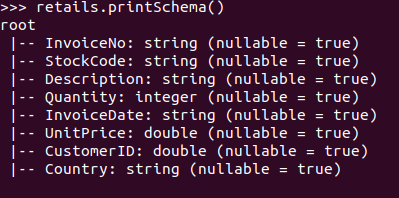

In [ ]:
retails.createOrReplaceTempView("retails")
# retails 스키마를 가지고 새로운 "retails" 생성
# 스키마 구조 따오기

In [ ]:
from pyspark.sql.functions import lit

In [ ]:

retails.select(lit(5), lit("five"), lit(5.0))

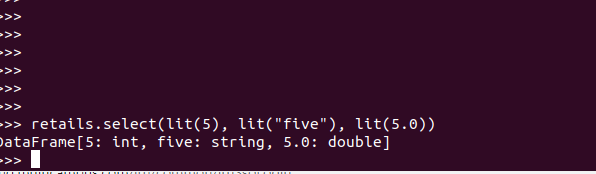

In [ ]:
double은 실수를 의미함(real number)

# 참거짓.boul타입

In [ ]:
from pyspark.sql.functions import col

In [ ]:
retails.where(col("InvoiceNo") != 536365).select("InvoiceNo", "Description").show(5)
# where(col("InvoiceNo") != 536365) 조건식이라서 결국은 참거짓이 됨

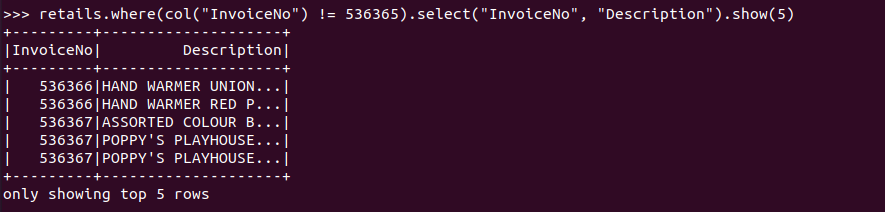

In [ ]:
retails.select("InvoiceNo", "Description").where(col("InvoiceNo") != 536365).show(5, False)
# 생략부분까지 다 나오게 함.

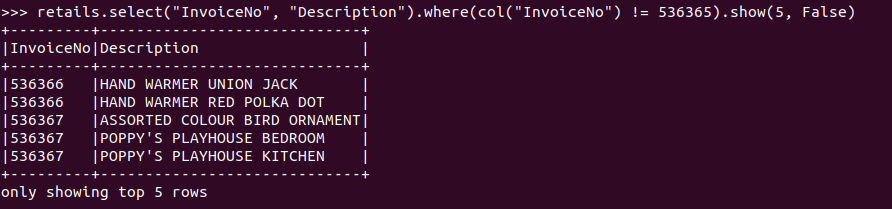

In [ ]:
 # 데이터 프레임 형식은 where와 select쓰는 순서 상관없음(계속했으니 알겠지.)

In [ ]:
retails.where("InvoiceNo != 536365").show(5)
retails.where("InvoiceNo <> 536365").show(5)
# 따로 select조건 안주면 전체 선택으로 생각함.

In [ ]:
# 조건 많이있는형태
from pyspark.sql.functions import instr  
price_filter = col("UnitPrice") > 600  #  col("UnitPrice") > 600 이거 where조건문인데 새변수에 줌
descript_filter = instr(retails.Description,"POSTAGE") >= 1
# retails 테이블에서 Description컬럼에서 "POSTAGE"을 포함하고 있다면 ...
#그 위치를 표시해줌
# INSTR은 포함하고고 있다면 위치를 알려주고 없으면 0으로 반환하니 0보다큰 즉 1보다
# 큰 조건을 걸어준 상황이다.
# INSTR은 인덱스값 반환(인덱스 1부터 시작함)
dot_code_filter = col("StockCode") == "DOT"
retails.withColumn("isExpensive",dot_code_filter&(price_filter|descript_filter)).where("isExpensive")\
.select("UnitPrice","IsExpensive").show()

# A&(B|C)  A AND(B or C)

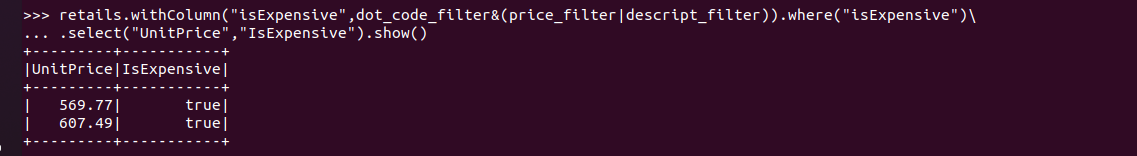

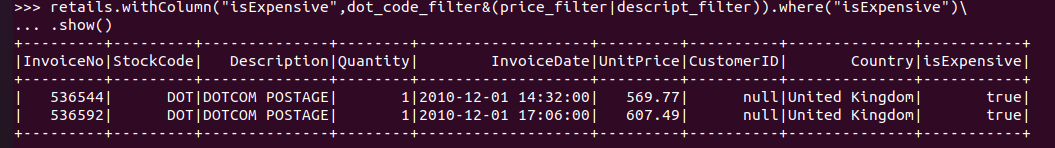

In [ ]:

spark.sql("""
SELECT UnitPrice, 
(StockCode = 'DOT' AND (UnitPrice > 600 OR instr(Description, 'POSTAGE') >= 1))
AS isExpensive
FROM retails 
WHERE (StockCode = 'DOT' AND (UnitPrice > 600 OR instr(Description, 'POSTAGE') >= 1)) 
""").show(5)

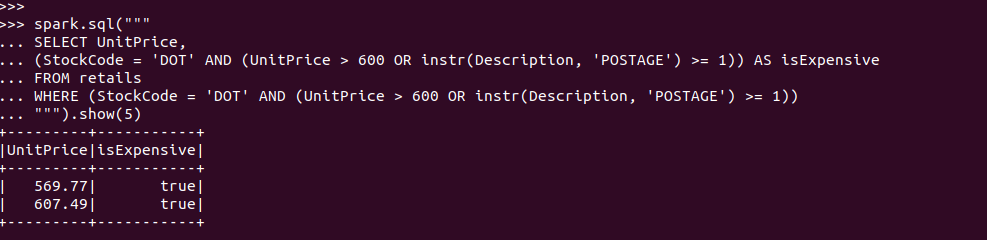

In [ ]:

spark.sql("""
SELECT UnitPrice FROM retails WHERE (StockCode = 'DOT' AND (UnitPrice > 600 OR instr(Description, 'POSTAGE') >= 1)) 
""").show(5)

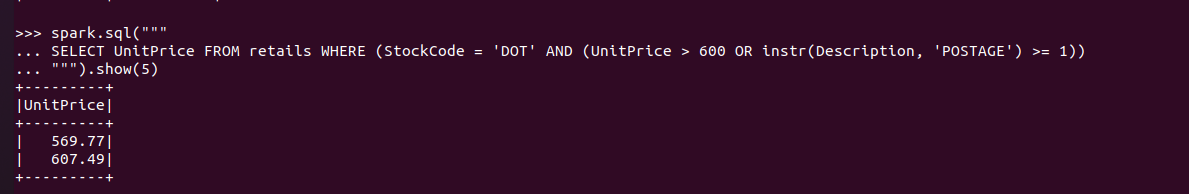

In [ ]:

from pyspark.sql.functions import pow #거듭제곱
from pyspark.sql.functions import expr #

In [ ]:
# 예제

In [ ]:
# (현재 갯수 * 가격)^2 + 5

In [ ]:
real_quantity = pow(col("Quantity") * col("UnitPrice"), 2) + 5

In [ ]:
#power 거듭제곱
retails.select(col("CustomerId"), expr("(POWER((Quantity * UnitPrice), 2) + 5) AS RealQuantity")).show(5)
retails.select(col("CustomerId"), real_quantity.alias("RealQuantity")).show(5)


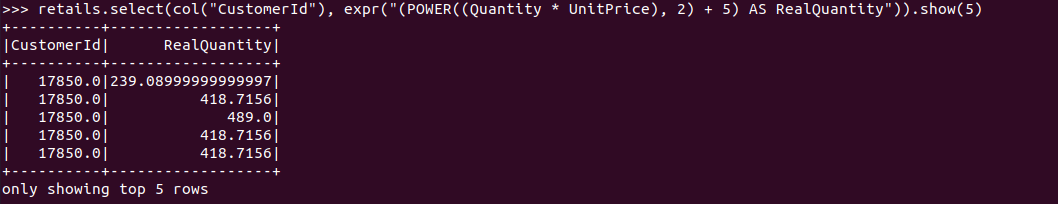

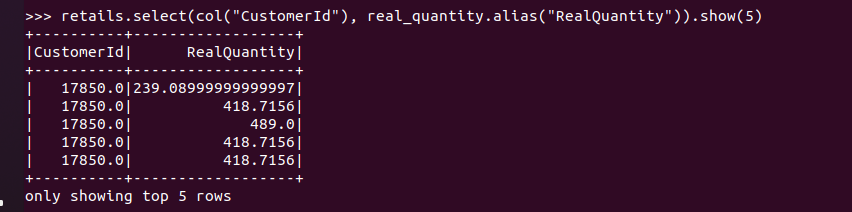

In [ ]:
from pyspark.sql.functions import round, bround

In [ ]:
retails.select(round(lit("2.5")), bround(lit("2.5"))).show(1)
spark.sql("SELECT ROUND(2.5), BROUND(2.5)").show(1)  
# 왜 from절이 없을까?
# 오라클로 생각한다면 임시테이블로 만들때(dual 같은 임시 테이블) from절 안쓴거처럼
# 파이스파크에서는 프롬절 안써도 잘돌아감.

# 반올림. 내림

In [ ]:
retails.describe().show() # 한번에 나오기 # 다음중 계산안되는 애들은 null로 나옴

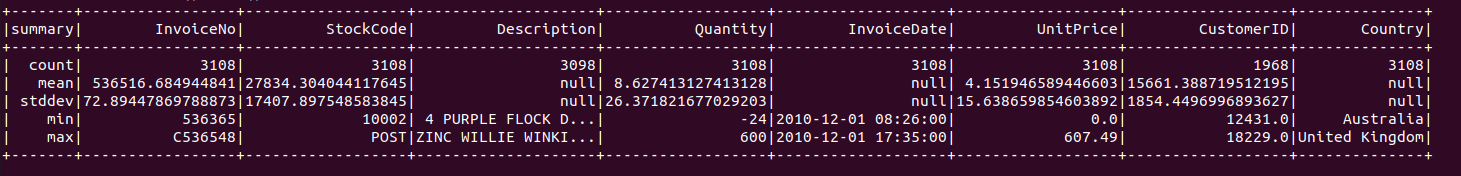

In [ ]:
#따로 따로 나오기

In [ ]:
retails.select(count("unitPrice"),mean("unitPrice")).show()

In [ ]:
retails.select(count("UnitPrice"), mean("UnitPrice"), stddev_pop("UnitPrice"), \
min("UnitPrice"), max("UnitPrice")).show()

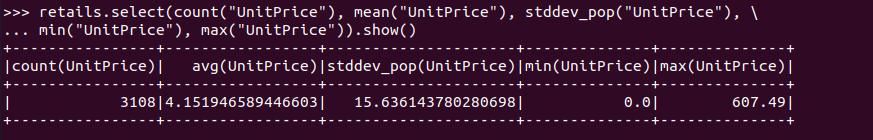

In [ ]:
from pyspark.sql.functions import monotonically_increasing_id

In [ ]:
retails.select("*", monotonically_increasing_id()).show(5)

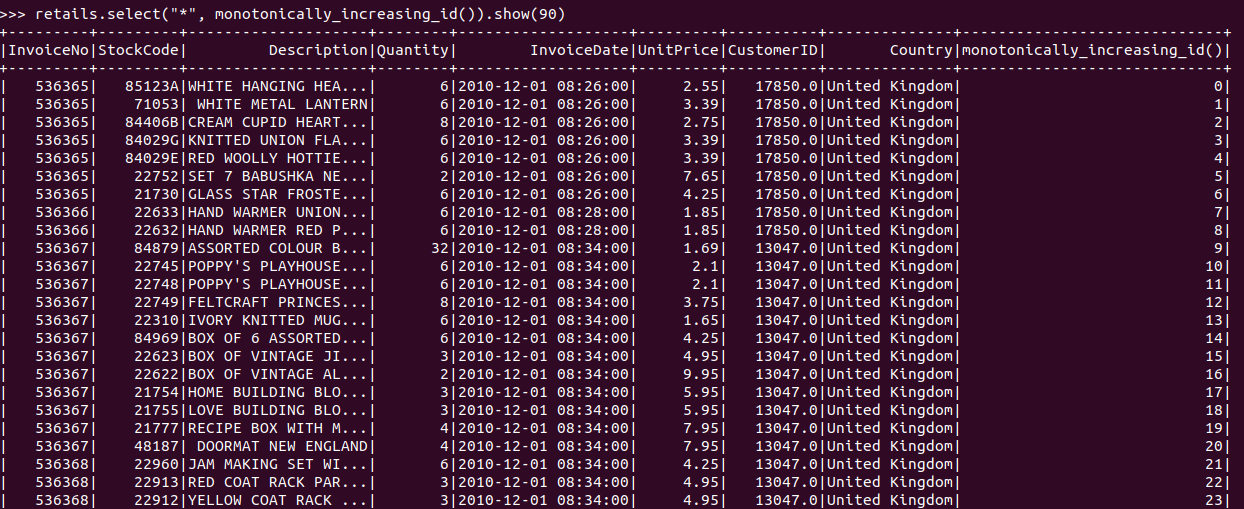

In [ ]:
# 근데 프로젝트할떄 .id뻥튀기됬던거..기억나려나...
https://docs.microsoft.com/ko-kr/azure/databricks/kb/sql/gen-unique-increasing-values